# Machine Learning in the Real World

##                1.Data preparation and cleaning

## Import Python Libraries

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn 
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.linear_model as lm
from sklearn import metrics, preprocessing, svm
from sklearn.model_selection import cross_val_score


%matplotlib inline

## Reading the Income Classification Dataset

In [55]:
data = pd.read_csv('fb_pages240117.csv')

columns_to_drop = ['manual_match','company_type', 'bigrams_intersection', 'times_prosecutor', 'times_defendant', 'days_from_company_status_to_now', 
                   'companies_general_info_columns', 'distinct_interacting_users_1qr_before_status', 'distinct_interacting_users_2qr_before_status', 'distinct_interacting_users_3qr_before_status', 'distinct_interacting_users_4qr_before_status',
                   'distinct_commentators_1qr_months_before_status', 'distinct_commentators_2qr_months_before_status', 'distinct_commentators_3qr_months_before_status', 'distinct_commentators_4qr_months_before_status',
                   'distinct_commentators_6months_before_status', 'distinct_commentators_12months_before_status', 'distinct_commentators_6months_after_status',
                   'distinct_interacting_users_6months_before_status', 'distinct_interacting_users_12months_before_status', 'distinct_interacting_users_6months_after_status',
                   'last_time_of_post_with_comment', 'last_post_with_reaction_time', 'has_country_state', 'has_country_or_state_or_city', 'has_more_than_100_likes', 'has_more_than_10_likes', 'has_more_than_1_likes',
                   'company_name', 'company_id', 'company_status_date', 'times_unknown_appearences', 'phone', 'email',
                   'page_name', 'companies_posts_comments_new_columns', 'companies_posts_reactions_columns', 'companies_events_columns', 'last_event_time', 'first_event_time',
                   'companies_photos', 'companies_posts_columns', 'first_time_of_post_with_comment', 'first_post_with_reaction_time', 'companies_posts_calculation_date', 
                   'last_post_time', 'is_published', 'is_community_page', 'total_maybe', 'min_maybe_per_event', 'max_maybe_per_event',
                   'avg_maybe_per_event', 'total_noreply', 'min_noreply_per_event', 'max_noreply_per_event', 'avg_noreply_per_event',
                   'min_number_of_people_tagged_in_photos', 'max_number_of_people_tagged_in_photos', 'avg_number_of_people_tagged_in_photos_when_more_than_zero',
                   'number_of_photos_1qr_before_status', 'number_of_photos_2qr_before_status', 'number_of_photos_3qr_before_status', 'number_of_photos_4qr_before_status',
                   'number_of_photos_6months_before_status', 'number_of_photos_12months_before_status', 'days_from_last_post_to_now', 'days_from_last_post_to_company_status']

data = data.drop(columns_to_drop, axis = 1)
data = data[np.isfinite(data['number_of_likes'])]

columns = list(data)
nun_numeric_variables = []
for c in columns:
    if (data[c].dtypes != np.float64) and (data[c].dtypes != np.int64):
        nun_numeric_variables.append(c)

categorical_variables = ['category_list', 'category']
binary_variables = ['is_unclaimed', 'is_verified', 'is_permanently_closed']
date_variables = ['start_info','first_photo_time', 'last_photo_time', 'first_post_time']




data[categorical_variables] = data[categorical_variables].fillna('unknown') # NaN to unknown

for variable in binary_variables:
    data[variable] = data[variable].astype(int)

data = data.drop(date_variables, axis = 1) #TODO: change date to days till today

counter_variables = ['general_info_words', 'general_info_length', 'description_length', 'description_words', 
                     'about_length', 'about_words', 'products_length', 'products_words', 'number_of_different_months_with_comments',
                     'total_posts_with_comments', 'distinct_commentators', 'number_of_different_months_with_reactions', 'total_posts_with_reactions',
                     'distinct_interacting_users', 'total_attending', 'min_attending_per_event', 'max_attending_per_event', 'avg_attending_per_event', 'total_interested', 
                     'min_interested_per_event', 'max_interested_per_event', 'avg_interested_per_event', 'total_declined',
                     'min_declined_per_post', 'max_declined_per_post','avg_declined_per_post', 'number_of_photos_with_tagged_people_without_self',
                     'number_of_different_photo_uploaders', 'number_of_photos_with_tagged_people_without_self', 'total_number_of_people_tagged_in_photos',
                     'number_of_photos_self_tagged', 'avg_number_of_people_tagged_in_photos', 'number_of_different_months_for_photos', 
                     'total_photos', 'number_of_albums', 'number_of_normal_albums', 'number_of_wall_albums', 'number_of_mobile_albums',
                     'number_of_cover_albums', 'number_of_profile_albums', 'number_of_app_albums', 'number_of_null_albums', 'number_of_photos_in_normal_albums',
                     'number_of_photos_in_wall_albums', 'number_of_photos_in_mobile_albums', 'number_of_photos_in_cover_albums', 'number_of_photos_in_profile_albums',
                     'number_of_photos_in_app_albums', 'number_of_photos_in_null_albums']

data[counter_variables] = data[counter_variables].fillna(0) 

category_dv = pd.get_dummies(data['category']) #TODO: check category_list
pp_data = pd.concat([data, category_dv], axis=1)
pp_data.drop(categorical_variables, 1, inplace=True)
# for  c in list(data):
#     if np.sum(data[c].isnull()) > 0:
#         print c, np.sum(data[c].isnull())

# data.isnull().any().any()
pp_data.head(20)

,page_handle,changed_picture,has_website,has_top_20_website,has_phone,has_email,number_of_likes,checkins,were_here_count,talking_about_count,...,Tours/Sightseeing,Transport/Freight,Transportation,Travel/Leisure,University,Vitamins/Supplements,Website,Wine/Spirits,Work Position,Writer
0,3.936822e+14,1.0,1.0,1.0,1.0,0.0,67.0,1.0,1.0,23.0,...,0,0,0,0,0,0,0,0,0,0
1,1.058584e+14,0.0,0.0,0.0,0.0,0.0,40.0,54.0,54.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1.077849e+14,1.0,0.0,0.0,0.0,0.0,138.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1.086047e+14,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,2.263365e+14,0.0,0.0,0.0,0.0,0.0,2.0,21.0,21.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5,1.107278e+14,1.0,0.0,0.0,0.0,0.0,73.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
6,1.197459e+14,1.0,1.0,1.0,1.0,0.0,1269.0,0.0,0.0,1.0,...,0,0,0,1,0,0,0,0,0,0
7,1.209301e+14,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0
8,1.279010e+14,0.0,1.0,1.0,1.0,0.0,153.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
9,1.378975e+14,1.0,1.0,1.0,1.0,0.0,516.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
def binning(col,bin_num, labels=None):
    if labels is None:
        labels = ['BIN_'+str(i) for i in range(bin_num)]

    colBin = pd.qcut(col,bin_num,labels=labels)
    return colBin

def plot_results(x, y, tag, arg):
    plt.plot(x, y)
    plt.title(tag + " as a function of " + arg)
    plt.xlabel(arg)
    plt.ylabel(tag)
    plt.show()

In [57]:
rf_train_len = 1600
rf_labels = binning(pp_data['number_of_likes'], 3)
rf_train_set = pp_data[:rf_train_len].copy()
rf_test_set = pp_data[rf_train_len:].copy()

rf_train_labels = rf_labels[:rf_train_len].copy()
rf_test_labels = rf_labels[rf_train_len:].copy()
rf_train_set.drop(['number_of_likes', 'page_handle'], 1, inplace=True)
rf_test_set.drop(['number_of_likes', 'page_handle'], 1, inplace=True)

In [58]:
forest = RandomForestClassifier(n_estimators=250, max_depth=15)
forest.fit(rf_train_set.values, rf_train_labels.values)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking - Top 10:")
for f in range(10):
    print("%d. feature %d (%s)\n   score: %f" % (f + 1, indices[f], list(rf_train_set)[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plot_idxs = indices[:30]
plt.figure()
plt.title("Feature importances (Top 30)")
plt.bar(range(30), importances[plot_idxs],
       color="r", yerr=std[plot_idxs], align="center")
plt.xticks(range(30), plot_idxs)
plt.xlim([-1, 31])
plt.show()

Feature ranking - Top 10:
1. feature 5 (checkins)
   score: 0.052472
2. feature 6 (were_here_count)
   score: 0.049670
3. feature 0 (changed_picture)
   score: 0.041052
4. feature 108 (distinct_interacting_users)
   score: 0.038190
5. feature 86 (total_likes_to_user_posts)
   score: 0.036711
6. feature 106 (number_of_different_months_with_reactions)
   score: 0.035976
7. feature 107 (total_posts_with_reactions)
   score: 0.032670
8. feature 65 (total_posts)
   score: 0.029337
9. feature 49 (number_of_albums)
   score: 0.029186
10. feature 88 (max_likes_per_user_posts)
   score: 0.027659


## RF parameter refinement

(threshold, depth, min_samples) -> cross-val average score
0.777245451026 -> (0, 5, 1)
0.779239231925 -> (0, 5, 3)
0.776023391813 -> (0, 5, 5)
0.812884615385 -> (0, 10, 1)
0.787946496031 -> (0, 10, 3)
0.782254420622 -> (0, 10, 5)
0.815149286259 -> (0, 15, 1)
0.783356725146 -> (0, 15, 3)
0.780129751851 -> (0, 15, 5)
0.810703749092 -> (0, 20, 1)
0.791979525988 -> (0, 20, 3)
0.780129751851 -> (0, 20, 5)
0.813779421125 -> (0, 25, 1)
0.791979525988 -> (0, 25, 3)
0.780129751851 -> (0, 25, 5)
0.809613642419 -> (0, None, 1)
0.791979525988 -> (0, None, 3)
0.780129751851 -> (0, None, 5)
0.777245451026 -> (0.01, 5, 1)
0.779239231925 -> (0.01, 5, 3)
0.776023391813 -> (0.01, 5, 5)
0.812884615385 -> (0.01, 10, 1)
0.787946496031 -> (0.01, 10, 3)
0.782254420622 -> (0.01, 10, 5)
0.815149286259 -> (0.01, 15, 1)
0.783356725146 -> (0.01, 15, 3)
0.780129751851 -> (0.01, 15, 5)
0.810703749092 -> (0.01, 20, 1)
0.791979525988 -> (0.01, 20, 3)
0.780129751851 -> (0.01, 20, 5)
0.813779421125 -> (0.01, 25, 1)
0.7

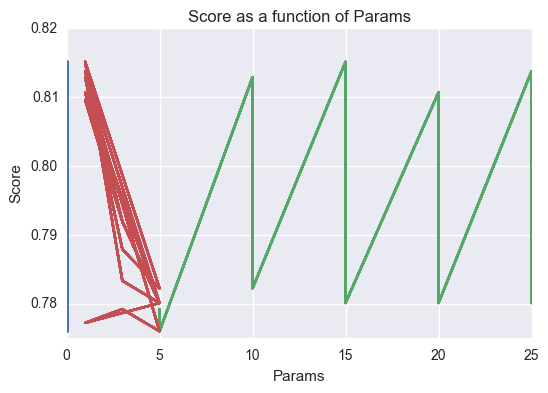

In [62]:
importances_thresholds = [0, 0.01, 0.02, 0.03, 0.04]
max_depths = [5, 10, 15, 20, 25, None] 
min_samples_leaf = [1, 3, 5]

filtered_by_thresholds = []
for t in importances_thresholds:
    columns = []
    for f in range(rf_train_set.shape[1]):
        if importances[indices[f]] >= t:
            columns.append(list(rf_train_set)[indices[f]])
    filtered_by_thresholds.append(columns)

params = []
score_summary = []
print "(threshold, depth, min_samples) -> cross-val average score"
for i in range(len(filtered_by_thresholds)):
    for d in max_depths:
        for l in min_samples_leaf:
            cols = filtered_by_thresholds[i]
            forest = RandomForestClassifier(n_estimators=250, random_state=0, max_depth=d, min_samples_leaf=l)
            forest.fit(rf_train_set, rf_train_labels)
            temp_predictions = forest.predict(rf_test_set)
            res = metrics.precision_score(rf_test_labels, temp_predictions, average='macro')
            score_summary.append(res)
            params.append((importances_thresholds[i], d, l))
            print "%s -> %s" % (score_summary[-1], params[-1])
    
max_idx = np.argmax(score_summary)
best_threshold = params[max_idx][0]
best_max_depth = params[max_idx][1]
best_min_leaf = params[max_idx][2]

# Print best hyper parameters
print "RF best parameters:"
print "max_depth = ", best_max_depth
print "importance_threshold = ", best_threshold
print "min_samples_leaf = ", best_min_leaf

In [63]:
forest = RandomForestClassifier(n_estimators=250, max_depth=best_max_depth, min_samples_leaf=best_min_leaf)
selected_features = filtered_by_thresholds[importances_thresholds.index(best_threshold)]
forest.fit(rf_train_set[selected_features].values, rf_train_labels.values)

pp_data['rf_likes_class'] = forest.predict(pp_data[selected_features])

In [1]:
print "Forest train set prediction results:"
print "===================================="
print metrics.classification_report(rf_train_labels, forest.predict(rf_train_set[selected_features]))
print ""
print "Forest test set prediction results:"
print "==================================="
print metrics.classification_report(rf_test_labels, forest.predict(rf_test_set[selected_features]))


Forest train set prediction results:


NameError: name 'metrics' is not defined

In [44]:
data[['page_handle', 'number_of_likes']].corr()

,page_handle,number_of_likes
page_handle,1.00000,-0.03803
number_of_likes,-0.03803,1.00000


## Adding Header to Data Files 

In [5]:
train_data.columns = ['age', 'workclass', 'observation-weight', 'education', 'education-num', 'marital-status', 
                      'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
                      'hours-per-week', 'native-country', 'class']
test_data.columns = ['age', 'workclass', 'obervation-weight', 'education', 'education-num', 'marital-status', 
                     'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
                     'hours-per-week', 'native-country', 'class']

In [6]:
train_data.head(10)

,age,workclass,observation-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [7]:
train_data.head(1).to_dict()

{'age': {0: 39},
 'capital-gain': {0: 2174},
 'capital-loss': {0: 0},
 'class': {0: ' <=50K'},
 'education': {0: ' Bachelors'},
 'education-num': {0: 13},
 'hours-per-week': {0: 40},
 'marital-status': {0: ' Never-married'},
 'native-country': {0: ' United-States'},
 'observation-weight': {0: 77516},
 'occupation': {0: ' Adm-clerical'},
 'race': {0: ' White'},
 'relationship': {0: ' Not-in-family'},
 'sex': {0: ' Male'},
 'workclass': {0: ' State-gov'}}

## Drop Unnecessary Column

In [8]:
train_data = train_data.drop('observation-weight', axis = 1)
test_data = test_data.drop('obervation-weight', axis = 1)

In [9]:
train_data.head(10)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


## Specifying Data Types

In [10]:
binary_variables = ['class']
categorical_variables = ['workclass', 'education', 'education-num', 'marital-status', 
                         'occupation', 'relationship', 'race', 'sex', 'native-country']
numeric_variables = ['hours-per-week','age','capital-gain','capital-loss']

## Type Conversion

In [11]:
train_data[categorical_variables].dtypes

workclass         object
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
native-country    object
dtype: object

In [12]:
train_data[numeric_variables].dtypes

hours-per-week    int64
age               int64
capital-gain      int64
capital-loss      int64
dtype: object

## Categorical and Binary Variables to String

In [13]:
for variable in categorical_variables + binary_variables:
    train_data[variable] = train_data[variable].astype(np.str)
    test_data[variable] = test_data[variable].astype(np.str)

## Numeric Variables to Float

In [14]:
for variable in numeric_variables:
    train_data[variable] = train_data[variable].astype(np.float)
    test_data[variable] = test_data[variable].astype(np.float)

In [15]:
train_data[numeric_variables].dtypes

hours-per-week    float64
age               float64
capital-gain      float64
capital-loss      float64
dtype: object

## Remove Whitespaces

In [16]:
# Map(func,sequence) -  operates a function on a sequence
# Lambda var1,var2.. : Expression -  Creates an inline function
for variable in categorical_variables + binary_variables:
    train_data[variable] = train_data[variable].map(lambda x : x.strip())
    test_data[variable] = test_data[variable].map(lambda x : x.strip())

## Binarize class label

In [17]:
train_data['class'] = train_data['class'].map(lambda x : '0' if x == '<=50K' else '1')
test_data['class'] = test_data['class'].map(lambda x : '0' if x == '<=50K' else '1')

In [18]:
test_data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25.0,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,0
1,38.0,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,0
2,28.0,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,1
3,44.0,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,1
4,18.0,?,Some-college,10,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,0


## Impute Missing Values

In [19]:
# missing values are appearing as '?'
# replace them with np.nan

for variable in train_data.columns:
    train_data[variable] = train_data[variable].replace('?', np.nan)

for variable in test_data.columns:
    test_data[variable] = test_data[variable].replace('?', np.nan)

In [20]:
np.sum(train_data.isnull())

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
class                0
dtype: int64

In [21]:
np.sum(test_data.isnull())

age                 0
workclass         963
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
class               0
dtype: int64

In [22]:
imputed_variables = ['workclass','occupation','native-country']
imputed_values = train_data[imputed_variables].mode()
print(imputed_values)

  workclass      occupation native-country
0   Private  Prof-specialty  United-States


In [23]:
for variable in imputed_variables:
    train_data[variable].fillna(value = imputed_values[variable][0], inplace=True)
    test_data[variable].fillna(value = imputed_values[variable][0], inplace=True)

In [24]:
train_data.head(10)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39.0,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,0
1,50.0,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,0
2,38.0,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0
3,53.0,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,0
4,28.0,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,0
5,37.0,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,0
6,49.0,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,0
7,52.0,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,1
8,31.0,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,1
9,42.0,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,1


## Randomly Shuffle Training Data

In [25]:
train_data = train_data.sample(frac = 1)

## Data Statistics

In [26]:
train_data.describe()

,age,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1077.648844,87.303830,40.437456
std,13.640433,7385.292085,402.960219,12.347429
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [27]:
for variable in categorical_variables:
  print ("-------------------------------")
  print ("Histogram for " + variable)
  print ("-------------------------------")
  print (train_data[variable].value_counts())
  print ("")

-------------------------------
Histogram for workclass
-------------------------------
Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

-------------------------------
Histogram for education
-------------------------------
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

-------------------------------
Histogram for education-num
-------------------------------
9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15

## Class distribution

In [28]:
print (train_data['class'].value_counts())

0    24720
1     7841
Name: class, dtype: int64


## Visualization

In [29]:
print(train_data[train_data['class'] == '0'])          

        age         workclass     education education-num      marital-status  \
27952  21.0           Private       HS-grad             9       Never-married   
18886  54.0           Private       HS-grad             9  Married-civ-spouse   
11885  40.0           Private    Assoc-acdm            12       Never-married   
25927  25.0           Private     Bachelors            13       Never-married   
4963   47.0           Private       Masters            14       Never-married   
985    63.0           Private     Assoc-voc            11            Divorced   
26040  29.0           Private       HS-grad             9       Never-married   
25458  26.0           Private    Assoc-acdm            12  Married-civ-spouse   
26029  52.0  Self-emp-not-inc     Assoc-voc            11  Married-civ-spouse   
27345  50.0           Private     Bachelors            13  Married-civ-spouse   
8248   23.0           Private     Bachelors            13  Married-civ-spouse   
6799   35.0         State-go

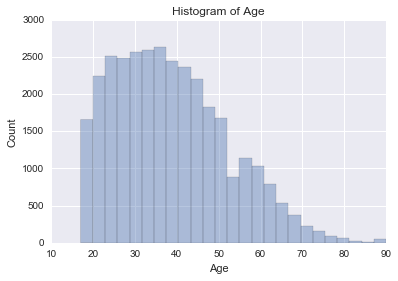

In [30]:
%matplotlib inline
sns.distplot(train_data.age, bins = 25, kde = False)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Count')
#plt.show()

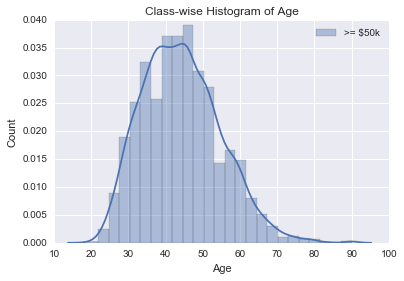

In [31]:
sns.distplot(train_data[train_data['class'] == '1'].age, bins = 25, kde = True, label = ">= $50k")
plt.title('Class-wise Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(loc="upper right")

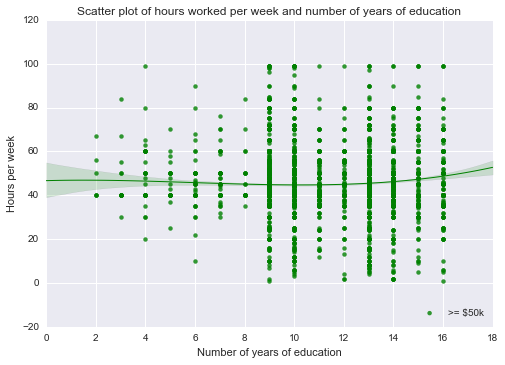

In [32]:
sns.set(color_codes=True)
train_data['education-num'] = train_data['education-num'].map(int)
sns.regplot('education-num', 'hours-per-week', train_data[train_data['class'] == '1'], 
            scatter_kws={"marker": ".", "color": "green"},
            line_kws = {"linewidth": "1", "color": "green"},
            order = 3,
            label = '>= $50k')
plt.xlabel('Number of years of education')
plt.ylabel('Hours per week')
plt.legend(loc="lower right")
plt.title("Scatter plot of hours worked per week and number of years of education")

## Binning numeric values

In [33]:
def binning(col,bin_num):
  #Define min and max values:
  minval = col.min()
  maxval = col.max()

  

  #if no labels provided, use default labels 0 ... (n-1)
  
  labels = ['BIN_'+str(i) for i in range(bin_num)]

  #Binning using cut function of pandas
  #colBin = pd.cut(col,bin_num,include_lowest=True)
  colBin = pd.cut(col,bin_num,labels=labels,include_lowest=True)
  return colBin

In [34]:
age=train_data['age'].head(5)
age_b=binning(train_data['age'],20).head(5)
for i in enumerate(zip(age,age_b)):
    print(i[1]) 

(21.0, 'BIN_1')
(59.0, 'BIN_11')
(54.0, 'BIN_10')
(40.0, 'BIN_6')
(25.0, 'BIN_2')


In [35]:
#bin all numeric variables:
categorical_variables = ['workclass', 'education', 'education-num', 'marital-status', 
                         'occupation', 'relationship', 'race', 'sex', 'native-country']
numeric_variables = ['hours-per-week','age','capital-gain','capital-loss']


numeric_variables_binned = []
for variable in numeric_variables:
    binned_output_column = variable + "_binned"
    train_data[binned_output_column] = binning(train_data[variable],20)
    test_data[binned_output_column] = binning(test_data[variable],20)
    numeric_variables_binned.append(binned_output_column)
    
    

In [36]:
train_data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,hours-per-week_binned,age_binned,capital-gain_binned,capital-loss_binned
27952,21.0,Private,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0.0,0.0,32.0,United-States,0,BIN_6,BIN_1,BIN_0,BIN_0
15390,59.0,Private,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States,1,BIN_7,BIN_11,BIN_0,BIN_0
18886,54.0,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,44.0,United-States,0,BIN_8,BIN_10,BIN_0,BIN_0
11885,40.0,Private,Assoc-acdm,12,Never-married,Adm-clerical,Not-in-family,White,Female,0.0,0.0,40.0,United-States,0,BIN_7,BIN_6,BIN_0,BIN_0
25927,25.0,Private,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0.0,0.0,40.0,United-States,0,BIN_7,BIN_2,BIN_0,BIN_0


## One Hot encoding:

In [37]:
pd.get_dummies(train_data['relationship'],prefix='relationship').head(10)

,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
27952,0.0,0.0,0.0,1.0,0.0,0.0
15390,1.0,0.0,0.0,0.0,0.0,0.0
18886,1.0,0.0,0.0,0.0,0.0,0.0
11885,0.0,1.0,0.0,0.0,0.0,0.0
25927,0.0,1.0,0.0,0.0,0.0,0.0
5431,0.0,0.0,0.0,0.0,0.0,1.0
4963,0.0,1.0,0.0,0.0,0.0,0.0
985,0.0,1.0,0.0,0.0,0.0,0.0
26040,0.0,1.0,0.0,0.0,0.0,0.0
1463,1.0,0.0,0.0,0.0,0.0,0.0


In [38]:
#Encode all binned numeric columns and categorical columns with oneHot
oh_train = train_data['class']
oh_test = test_data['class']

for variable in numeric_variables_binned+categorical_variables:
    onehot_train_col = pd.get_dummies(train_data[variable],prefix=variable)
    oh_train = pd.concat([oh_train,onehot_train_col],axis=1)
    
    onehot_test_col = pd.get_dummies(test_data[variable],prefix=variable)
    oh_test = pd.concat([oh_test,onehot_test_col],axis=1)
    

In [61]:
#check for missing values:
missing=[]
for i in oh_train.keys():
    if i not in oh_test.keys():
        missing.append(i)
for i in missing:
    oh_test[i]=0.0

## Build the model: Logistic regression

In [62]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(C=1e5)

#separate labels from data
train_class = oh_train['class']
oh_train_data= oh_train.drop('class',axis=1)

In [63]:
logreg.fit(oh_train_data, train_class)
print(logreg)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


## Evaluate results

In [90]:
from sklearn import metrics

test_class = oh_test['class']


expected = test_class.values
oh_test_data= oh_test.drop('class',axis=1)
predicted = logreg.predict(oh_test_data)
predicted_probs = logreg.predict_proba(oh_test_data)

In [103]:
print(metrics.classification_report(expected, predicted))

             precision    recall  f1-score   support

          0       0.81      0.97      0.89     12435
          1       0.76      0.28      0.41      3846

avg / total       0.80      0.81      0.77     16281

[ 0.00229664  0.23970629  0.08784965 ...,  0.25690392  0.16952656
  0.30020259]


## Cross-validation

In [85]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, oh_test_data, test_class, cv=5)

In [86]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.86 (+/- 0.01)


## Understanding Model Performance

In [68]:
import sklearn.metrics
 
def plotRoc(fpr, tpr, auc):
  plt.figure()
  plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic example')
  plt.legend(loc="lower right")
  plt.show()
    
def plotPR(precision, recall):
  plt.figure()
  plt.plot(recall, precision, label='PR curve')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('Precision Recall curve')
  plt.legend(loc='lower left')
  plt.show()
 
def plotMetrics(expected,predicted):
  y_true = expected
  y_score = predicted
  #y_score = df['rawPrediction'].map(lambda x: x['values'][1])
  auc = sklearn.metrics.roc_auc_score(y_true, y_score)
  fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_true, y_score)
  plotRoc(fpr, tpr, auc)
  precision, recall, thresholds = sklearn.metrics.precision_recall_curve(y_true, y_score, pos_label=1)
  plotPR(precision, recall)
  

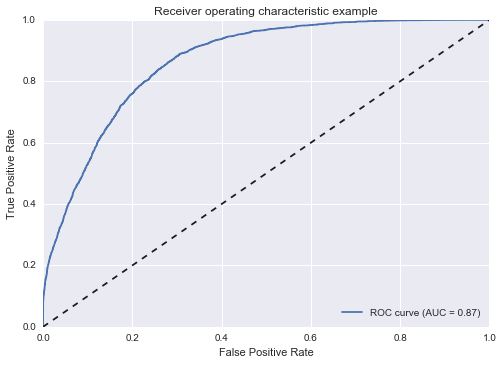

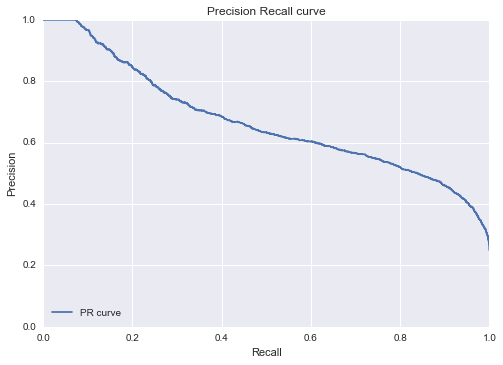

In [104]:
#plotMetrics(expected.astype('int'),predicted.astype('int'))
plotMetrics(expected.astype('int'),predicted_probs[:,1])
